##Descrição do Problema: O conjunto de dados fornece uma coleção de listas de empregos de cientistas de dados do Glassdoor. Ele inclui detalhes importantes como cargos, nomes de empresas, locais, salários estimados, datas de publicação e classificações de empresas. Este conjunto de dados é ideal para analisar tendências em funções de ciência de dados, faixas salariais e preferências de empresas no mercado de trabalho do Reino Unido em 2024.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#plt.switch_backend('TkAgg')
import seaborn as sns
import ast
from datasets import load_dataset
import re
%matplotlib inline

##Dicionário do Dataset:

Company: Name of the hiring company.

Company Score: Average rating of the company on Glassdoor.

Job Title: Title of the job position.

Location: Job location, including city and state.

Date: Date the job was posted or updated.

Salary: Estimated salary range for the position.

Skills:Skills required for the position

In [4]:
#!pip install ydata_profiling
#!pip install ipywidgets

In [5]:
from ydata_profiling import ProfileReport
from wordcloud import WordCloud

In [6]:
#Leitura do dataset

dados = pd.read_csv('/Users/geraldocangondo/Desktop/Data_Analise/Proj_Data Cleaning /Raw_Dataset.csv')
dados.sample(5)

,Company,Company Score,Job Title,Location,Date,Salary,Skills
593,JLL,4.4,Engineering Innovation AI Lead,"London, England",11d,£40K - £42K (Glassdoor est.),"Analysis skills, Machine learning, Natural lan..."
255,Crosslake Technologies,3.4,Lead AI & Data Scientist,"Manchester, England",21d,£40K - £95K (Glassdoor est.),"TensorFlow, Data mining, Data structures, Java..."
416,Dexcom,3.7,Marketing Analytics Lead,Remote,30d+,£49K - £100K (Glassdoor est.),"Jira, Kubernetes, Spark, Trello, Docker"
299,University of Cambridge,3.6,Research Associate - Bioinformatics/Data Scien...,"Cambridge, East of England, England",6d,£40K - £72K (Glassdoor est.),"TensorFlow, SQL, Machine learning, Data scienc..."
104,Seopa,4.2,Associate Data Scientist,"Belfast, Northern Ireland",30d+,£36K - £64K (Glassdoor est.),"Docker, Machine learning, Software development..."


In [7]:
dados.describe(include='all')

,Company,Company Score,Job Title,Location,Date,Salary,Skills
count,750,697.000000,750,750,750,635,742
unique,454,NaN,563,87,30,447,660
top,JPMorgan Chase & Co,NaN,Data Scientist,"London, England",30d+,£70K - £110K (Glassdoor est.),"Machine learning, Natural language processing,..."
freq,13,NaN,67,445,426,8,9
mean,NaN,3.847633,NaN,NaN,NaN,NaN,NaN
std,NaN,0.461629,NaN,NaN,NaN,NaN,NaN
min,NaN,1.700000,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.600000,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.900000,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.100000,NaN,NaN,NaN,NaN,NaN


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

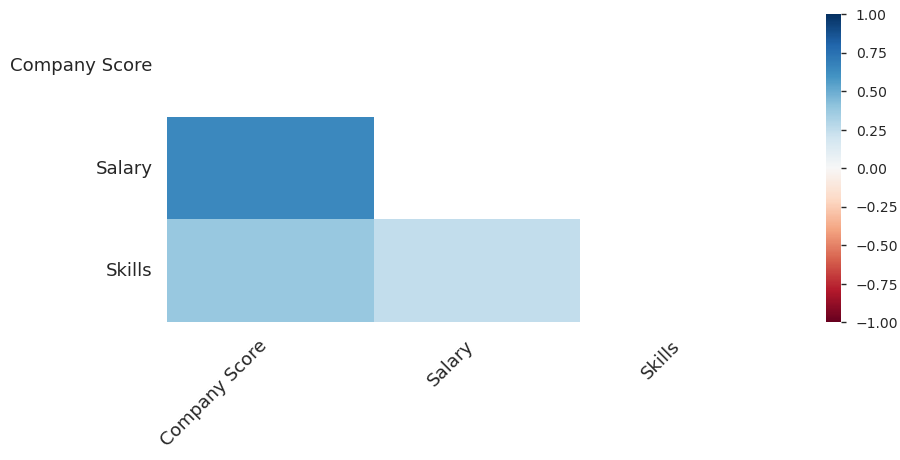

In [8]:
profile = ProfileReport(dados, title="Resumo_do_report")

profile.to_notebook_iframe()

In [9]:
dados['Salary']

0                 £35K (Employer est.)
1      £31.00 Per Hour (Employer est.)
2          £50K - £65K (Employer est.)
3         £41K - £54K (Glassdoor est.)
4          £60K - £90K (Employer est.)
                    ...               
745                                NaN
746                                NaN
747                                NaN
748                                NaN
749                                NaN
Name: Salary, Length: 750, dtype: object

In [10]:
dados['Salary'] = dados['Salary'].str.replace('£', '').str.replace('K', '000')

In [11]:
dados.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000 (Employer est.),"Data mining, Big data, R, Data analysis skills..."
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,31.00 Per Hour (Employer est.),"R, SQL, JavaScript, Python"
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000 (Employer est.),"SQL, Maths, Data science, Python"
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000 (Glassdoor est.),"Software deployment, Data analysis skills, Sta..."
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000 (Employer est.),"MATLAB, R, Maths, C, Machine learning"


In [12]:
dados['Salary'] = dados['Salary'].str.replace(r'\(Employer est.\)', '', regex=True)
dados['Salary'] = dados['Salary'].str.replace(r'\(Glassdoor est.\)', '', regex=True)

In [13]:
dados.sample(5)

,Company,Company Score,Job Title,Location,Date,Salary,Skills
395,Capgemini Invent,4.2,Managing Consultant - Data & AI Strategy - Dat...,"London, England",30d+,64000 - 95000,"TensorFlow, Azure, Big data, DevOps, Spark"
363,Ministry of Defence,3.2,DE&S Data Science Specialist,"Bristol, England",28d,48000 - 90000,"Azure, Pentaho, Big data, Spark, NoSQL"
474,causaLens,4.1,Value Consultant - Causal AI,"London, England",30d+,50000,"OOP, C++, Machine learning, AI, Communication ..."
613,Johnson Matthey,4.5,AI Strategy Lead,"Sonning, England",30d+,50000 - 51000,Machine learning
396,The Random House Group Limited,3.9,AI Applications Specialist (18-month FTC),"London, England",18d,46000 - 70000,"Machine learning, Deep learning, Natural langu..."


In [14]:
def convert_to_yearly(salary):
    if 'Per Hour' in str(salary):
        hourly_rate = re.findall(r'\d+\.?\d*', salary)
        if hourly_rate:
            return float(hourly_rate[0]) * 2080
    return salary

dados['Salary'] = dados['Salary'].apply(convert_to_yearly)

In [15]:
dados['Salary'] = dados['Salary'].astype(str)

In [16]:
dados[['salary_min', 'salary_max']] = dados['Salary'].str.split('-', expand=True)

In [17]:
dados.head(4)

,Company,Company Score,Job Title,Location,Date,Salary,Skills,salary_min,salary_max
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000,None
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,None
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000,65000
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000,54000


In [18]:
dados['salary_min'] = dados['salary_min'].str.strip()
dados['salary_max'] = dados['salary_max'].str.strip()

In [19]:
dados['salary_min'] = pd.to_numeric(dados['salary_min'], errors='coerce')
dados['salary_max'] = pd.to_numeric(dados['salary_max'], errors='coerce')

In [20]:
dados.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,salary_min,salary_max
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000.0,NaN
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,NaN
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000.0,65000.0
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000.0,54000.0
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000.0,90000.0


In [21]:
dados['Location'] = dados['Location'].astype(str)

In [22]:
dados[['city', 'country']] = dados['Location'].str.split(',', n=1, expand=True)

In [23]:
dados.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,salary_min,salary_max,city,country
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000.0,NaN,Manchester,England
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,NaN,London,England
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000.0,65000.0,Nottingham,England
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000.0,54000.0,Edinburgh,Scotland
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000.0,90000.0,London,England


In [24]:
skills_split = dados['Skills'].str.get_dummies(sep=', ')

In [25]:
skills_split

,AI,APIs,ASP.NET,ATS,AWS,Account management,Accounting,Adobe Flash,Agile,Alteryx,...,Unreal Engine,Usability,Visual Studio,Warehouse experience,Waterfall,Web services,WordPress,XML,iOS,iOS development
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
data_with_skills = pd.concat([dados, skills_split], axis=1)
data_with_skills.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,salary_min,salary_max,city,...,Unreal Engine,Usability,Visual Studio,Warehouse experience,Waterfall,Web services,WordPress,XML,iOS,iOS development
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000.0,NaN,Manchester,...,0,0,0,0,0,0,0,0,0,0
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,NaN,London,...,0,0,0,0,0,0,0,0,0,0
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000.0,65000.0,Nottingham,...,0,0,0,0,0,0,0,0,0,0
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000.0,54000.0,Edinburgh,...,0,0,0,0,0,0,0,0,0,0
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000.0,90000.0,London,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data_with_skills.shape

(750, 253)

In [28]:
skills_frequencies = data_with_skills.iloc[:, data_with_skills.columns.get_loc('AI'):].sum()
skills_frequencies

AI                 54
APIs               19
ASP.NET             1
ATS                 2
AWS                87
                   ..
Web services        1
WordPress           1
XML                 2
iOS                 2
iOS development     1
Length: 242, dtype: int64

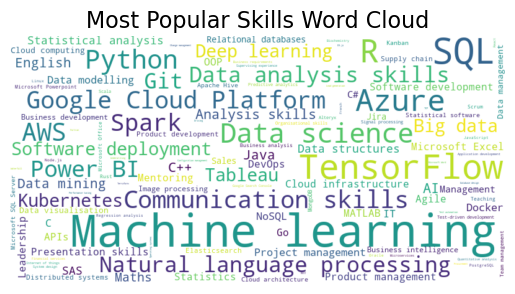

In [29]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skills_frequencies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Skills Word Cloud', fontsize=16)
plt.show()

In [34]:
skills_columns = data_with_skills.iloc[:, data_with_skills.columns.get_loc('AI'):].sum().sort_values(ascending=False)
top_10_skills = skills_columns.head(10)


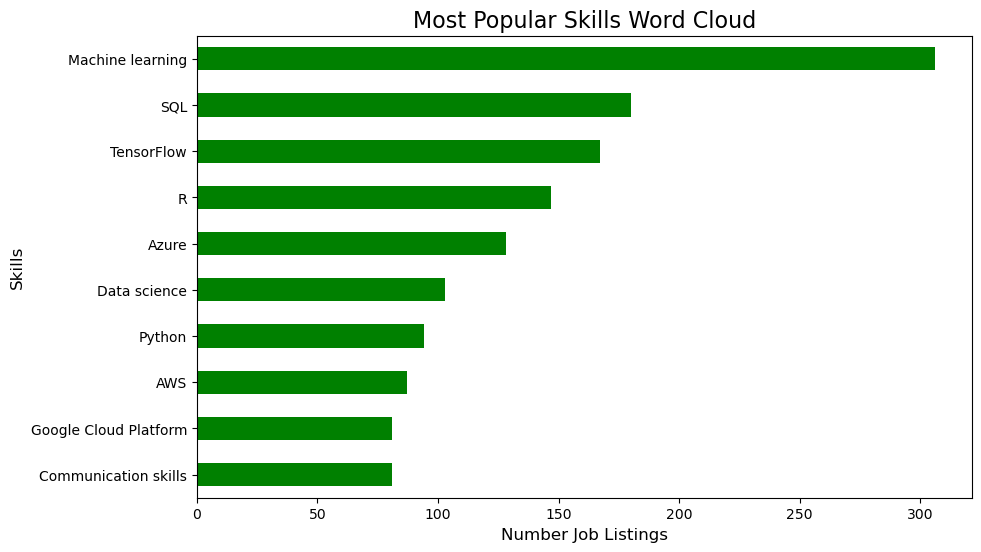

In [31]:
plt.figure(figsize=(10, 6))
top_10_skills.plot(kind='barh', color='green')
plt.title('Most Popular Skills Word Cloud', fontsize=16)
plt.xlabel('Number Job Listings', fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

In [32]:
data_jobs = data_with_skills[data_with_skills['Job Title'].str.contains('Data Analyst',case=False,na=False)]
data_skills = data_jobs.iloc[:, data_jobs.columns.get_loc('AI'):].sum().sort_values(ascending=False)

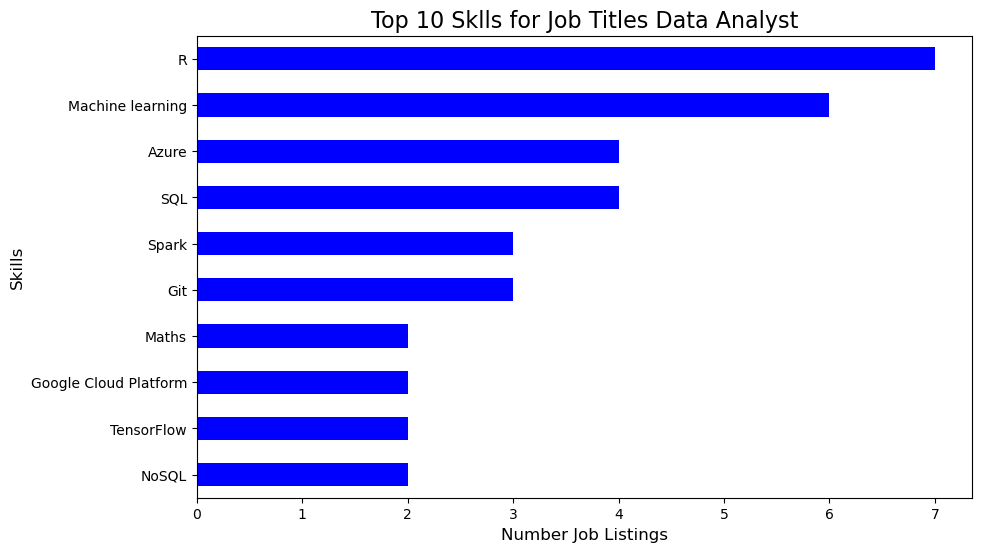

In [36]:
top_10_skills = data_skills.head(10)

plt.figure(figsize=(10, 6))
top_10_skills.plot(kind='barh', color='blue')
plt.title('Top 10 Sklls for Job Titles Data Analyst', fontsize=16)
plt.xlabel('Number Job Listings', fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

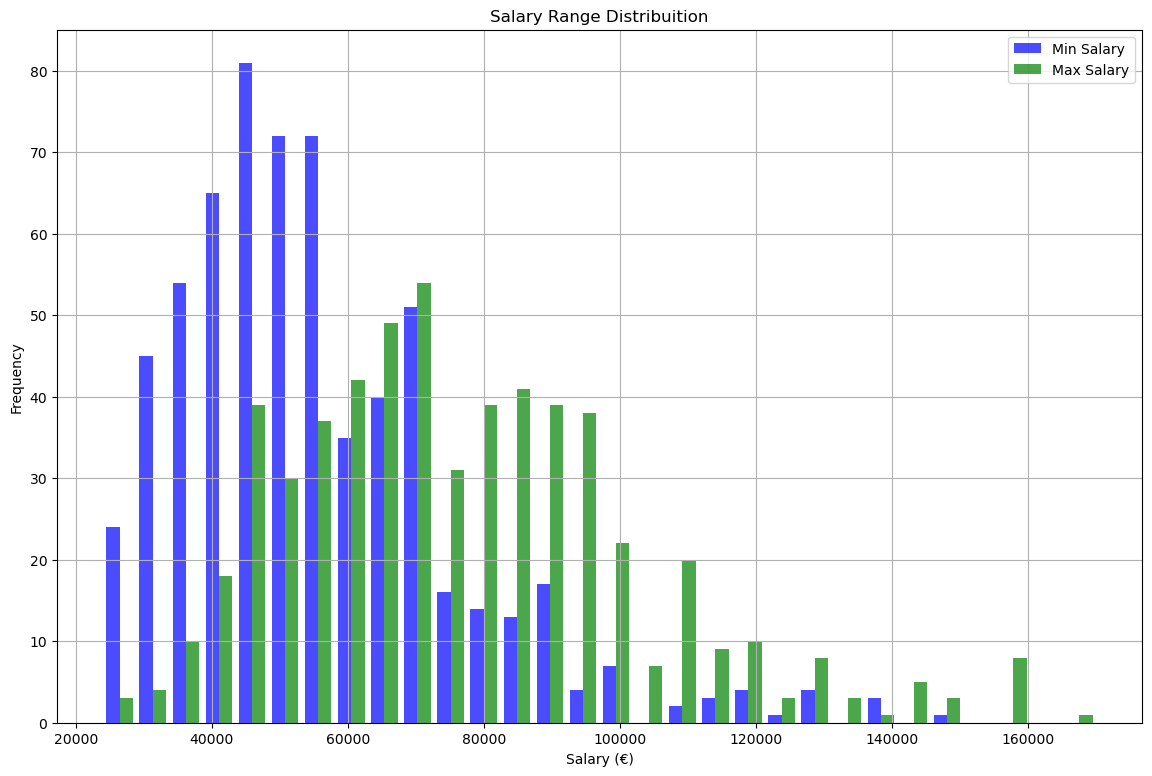

In [38]:
plt.figure(figsize=(14, 9))
plt.hist([dados['salary_min'], dados['salary_max']], bins=30, label=['Min Salary', 'Max Salary'], color=['blue', 'green'], alpha=0.7)
plt.title('Salary Range Distribuition')
plt.xlabel('Salary (€)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
top_companies = dados['Company'].value_counts().head(10)
top_job_title = dados['Job Title'].value_counts().head(10)

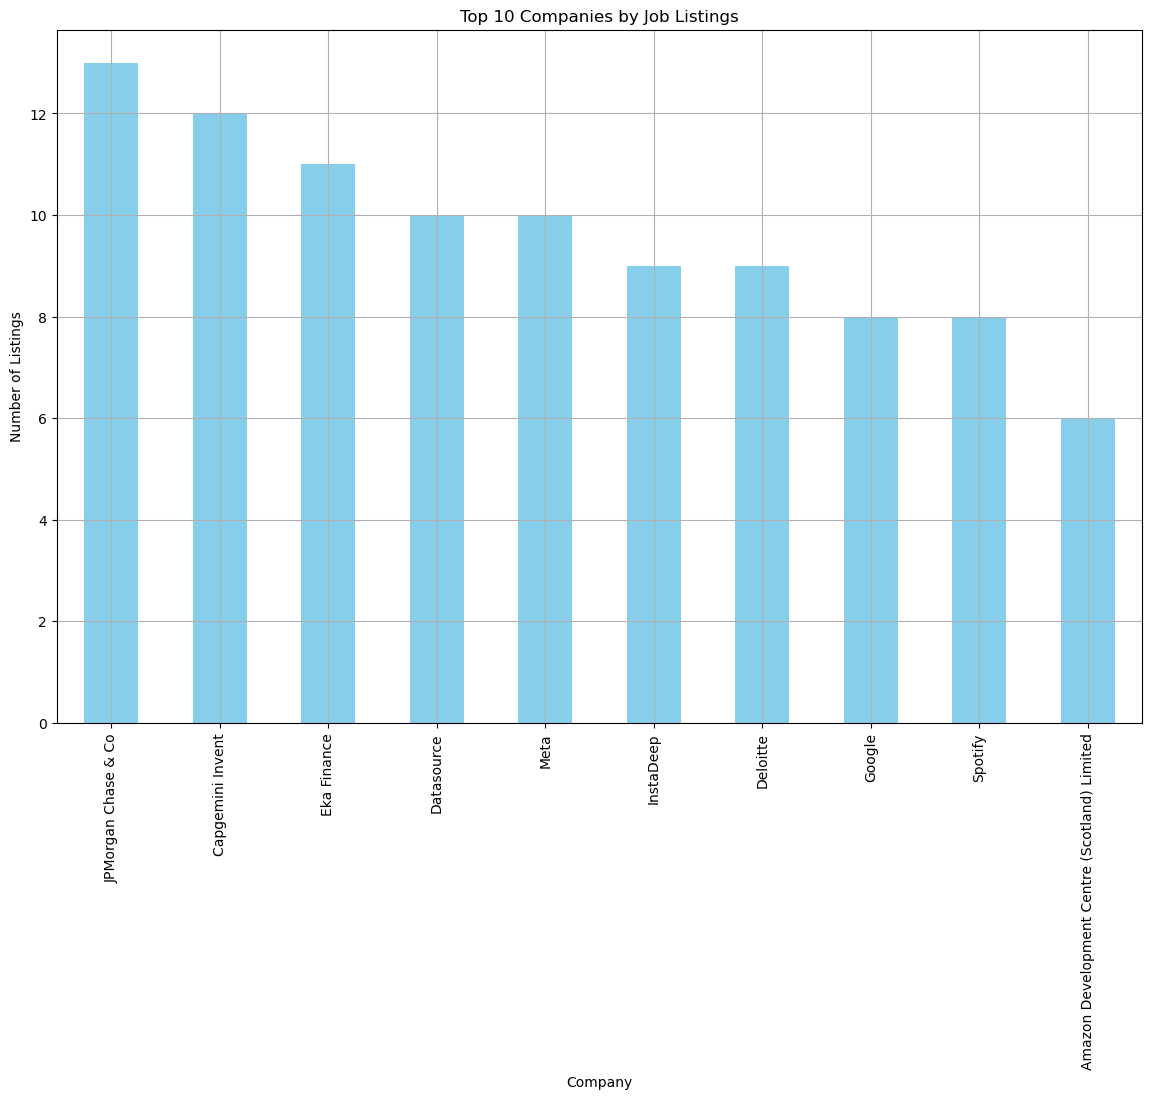

In [47]:
plt.figure(figsize=(14, 9))
top_companies.plot(kind='bar', color='skyblue')
plt.title('Top 10 Companies by Job Listings')
plt.xlabel('Company')
plt.ylabel('Number of Listings')
plt.grid(True)
#plt.xticks(ratation=45, ha='right')
plt.show()

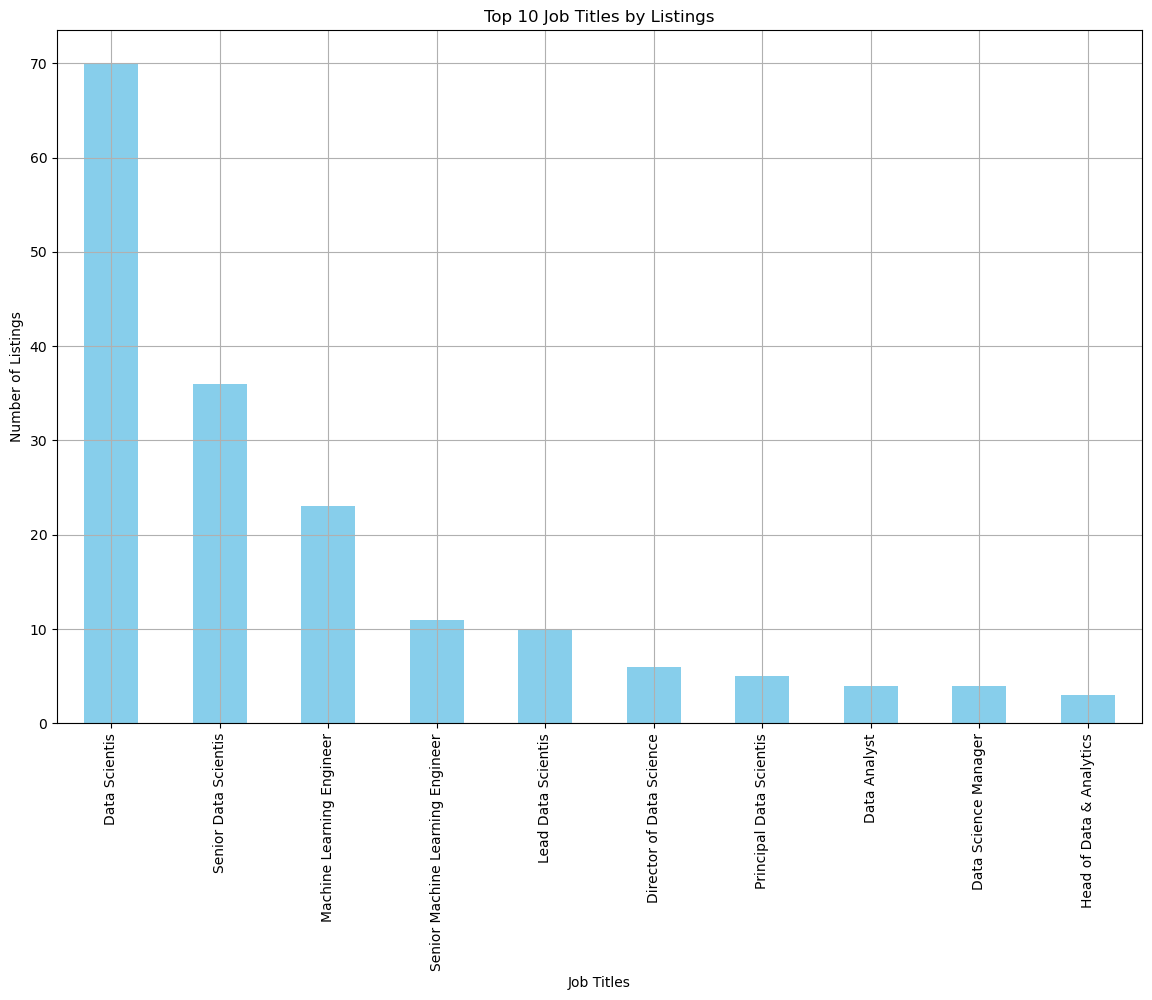

In [48]:
plt.figure(figsize=(14, 9))
top_job_title.plot(kind='bar', color='skyblue')
plt.title('Top 10 Job Titles by Listings')
plt.xlabel('Job Titles')
plt.ylabel('Number of Listings')
plt.grid(True)
#plt.xticks(ratation=45, ha='right')
plt.show()

In [45]:
dados['Job Title'] = dados['Job Title'].str.replace('DATA SCIENTIST', 'Data Scientis', case = False)